<a href="https://colab.research.google.com/github/Reem-Aboutaleb/ReemAboutaleb-Data-Science-Bootcamp/blob/main/Week6_HW_Reem_Aboutaleb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Homework) Week 6 - DataScience Bootcamp Fall 2025


**Name:** Reem Aboutaleb

**Email:** ra4188@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

### Answer for Problem 1: Dataset Splitting

1) To ensure the model generalizes to new speakers, the split must be done by speaker, not by individual recordings.  
This prevents the model from learning speaker-specific voice patterns.
A valid split is:
- Train: 80 speakers
- Validation: 10 different speakers
- Test: 10 completely unseen speakers

This way, the test accuracy reflects performance on new, unheard speakers.

2) For the additional 10,000 recordings from Kilian, we want strong performance for his voice while keeping generalization.

Strategy:
- First, train the model on the multi-speaker training set from Part 1 (this teaches general phone recognition).
- Then, fine-tune the model using Kilian’s recordings.
- Keep a small portion of Kilian’s data as validation to avoid overfitting (for example, 80% fine-tune / 20% validation).

This achieves:
- Broad phone recognition ability from many voices
- Personalized adaptation to Kilian’s voice



### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


### Problem 2: K-Nearest Neighbors

#### 1) 1-NN Classification (Decision Boundary)

Dataset:
Positive: (1,2), (1,4), (5,4)  
Negative: (3,1), (3,2)

To classify new points visually, we plot the training points and the decision boundary created by a 1-NN classifier.  
Each region of the plot belongs to whichever training point is closest.



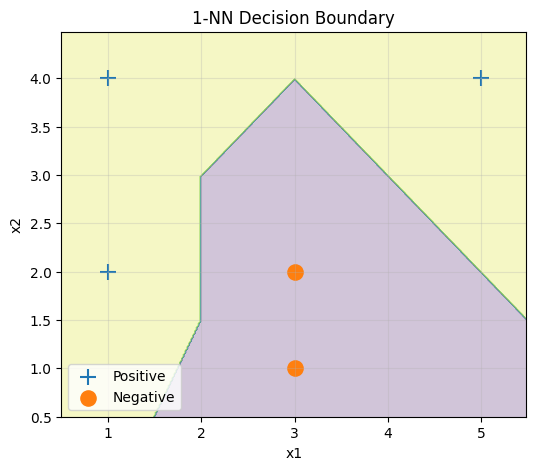

In [1]:
# 1-NN decision boundary plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X_pos = np.array([[1,2],[1,4],[5,4]])
X_neg = np.array([[3,1],[3,2]])
X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(len(X_pos)), -np.ones(len(X_neg))])

knn = KNeighborsClassifier(1).fit(X, y)

h = 0.02
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X_pos[:,0], X_pos[:,1], s=120, marker='+', label='Positive')
plt.scatter(X_neg[:,0], X_neg[:,1], s=120, marker='o', label='Negative')
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('1-NN Decision Boundary')
plt.legend(); plt.grid(alpha=0.3)
plt.show()



#### 2) Feature Scaling and Classification of (500,1)

Dataset:
Positive: (100,2), (100,4), (500,4)  
Negative: (300,1), (300,2)  
Point to classify: (500,1)

Before scaling:
Nearest neighbor = (500,4) → Positive

After scaling each feature to [0,1] (fit on training set only):
Nearest neighbor = (300,1) → Negative




In [2]:
# Before and after scaling classification
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

X_pos = np.array([[100,2],[100,4],[500,4]])
X_neg = np.array([[300,1],[300,2]])
X_train = np.vstack([X_pos, X_neg])
y_train = np.hstack([np.ones(len(X_pos)), -np.ones(len(X_neg))])
q = np.array([[500.,1.]])

pred_before = KNeighborsClassifier(1).fit(X_train, y_train).predict(q)[0]

scaler = MinMaxScaler().fit(X_train)
X_s = scaler.transform(X_train)
q_s = scaler.transform(q)

pred_after = KNeighborsClassifier(1).fit(X_s, y_train).predict(q_s)[0]

print("Before scaling:", "Positive" if pred_before==1 else "Negative")
print("After scaling:", "Positive" if pred_after==1 else "Negative")



Before scaling: Positive
After scaling: Negative


#### 3) Handling Missing Values

To handle missing features in a test point, use a K-NN imputer to fill the missing values based on the nearest neighbors in the training set.  
Then apply the K-NN classifier normally.



In [3]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline

X_train = np.array([[1,2],[1,4],[5,4],[3,1],[3,2]])
y_train = np.array([1,1,1,-1,-1])
q_missing = np.array([[5, np.nan]])

pipe = make_pipeline(KNNImputer(n_neighbors=3), KNeighborsClassifier(1))
pipe.fit(X_train, y_train)
print("Prediction:", "Positive" if pipe.predict(q_missing)[0]==1 else "Negative")





Prediction: Positive


#### 4) High-Dimensional Data

K-NN can still work for images even though they have many pixels because the model is not used directly on raw pixel values.  
Instead, images are transformed into a feature representation (for example, using PCA or deep neural network embeddings).  
In this feature space, similar images lie close together and dissimilar ones lie farther apart, making distance-based classification effective.




### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

**Answer**

1. Yes. Evaluating h(x) = sign(w·x) on both D_TR and D_TE allows us to measure classification accuracy on the training set and compare it to accuracy on the test set. If the model makes more mistakes on D_TE, then the test error is higher than the training error. This comparison shows how well the learned weight vector generalizes to unseen data.

2. There is no need to compute the training error explicitly because the Perceptron updates w only when it misclassifies a training example. The algorithm stops once it can classify all training points correctly. Therefore, convergence of the Perceptron already guarantees that the training error is zero.



### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [ ]:
import numpy as np

# Data: (x, y)
data = [
    (np.array([10, -2]), +1),
    (np.array([12,  2]), -1)
]

w = np.array([0., 0.])
updates = []

while True:
    error = False
    for x, y in data:
        if y * np.dot(w, x) <= 0:  # misclassified
            w = w + y * x
            updates.append(w.copy())
            error = True
    if not error:
        break

print("Number of updates:", len(updates))
print("Sequence of w vectors:")
for i, w_i in enumerate(updates, 1):
    print(i, w_i)
print("Final weight:", w)


Number of updates: 9
Sequence of w vectors:
1 [10. -2.]
2 [-2. -4.]
3 [ 8. -6.]
4 [-4. -8.]
5 [  6. -10.]
6 [ -6. -12.]
7 [  4. -14.]
8 [ -8. -16.]
9 [  2. -18.]
Final weight: [  2. -18.]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [ ]:
import numpy as np
w = np.zeros(5, int)
for x,y,c in [((0,0,0,0,4),+1,2), ((0,0,6,5,0),+1,1), ((3,0,0,0,0),-1,1),
              ((0,9,3,6,0),-1,1), ((0,1,0,2,5),-1,1)]:
    w += c * y * np.array(x)
w  # -> array([-3, -10,   3,  -3,   3])


array([ -3, -10,   3,  -3,   3])

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Final weight: [ 2.3  1.  -4. ]
Total updates: 12
Converged: 4 epochs, 12 updates. Final w: [ 2.3  1.  -4. ]


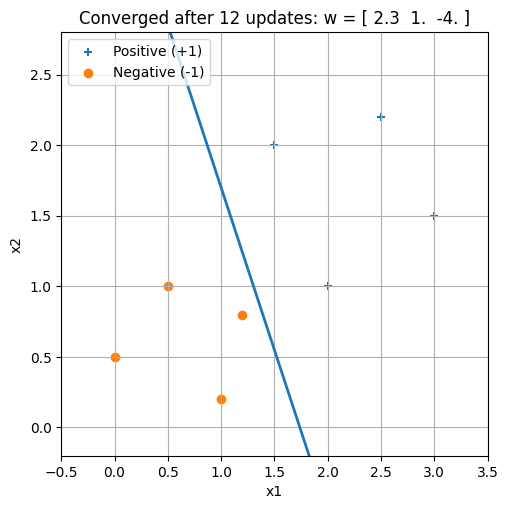

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
plt.rcParams["figure.figsize"] = (5.5, 5.5)

# ---- 1) Small, linearly separable 2D dataset (feel free to edit) ----
# Positive (y=+1) and Negative (y=-1) points in R^2
X_pos = np.array([[1.5, 2.0],
                  [2.0, 1.0],
                  [2.5, 2.2],
                  [3.0, 1.5]], dtype=float)
X_neg = np.array([[0.0, 0.5],
                  [0.5, 1.0],
                  [1.0, 0.2],
                  [1.2, 0.8]], dtype=float)

X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(len(X_pos)), -np.ones(len(X_neg))])

# Add bias feature x0=1 so that the hyperplane is w0*x + w1*y + b = 0
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

# ---- 2) Perceptron (online, mistake-driven) ----
eta = 1.0
w = np.zeros(3)             # [w_x, w_y, b]
updates = [w.copy()]
order = np.arange(len(Xb))

def plot_state(w, title):
    """Plot points and current decision boundary."""
    plt.clf()
    # data
    plt.scatter(X_pos[:,0], X_pos[:,1], marker='+', label='Positive (+1)')
    plt.scatter(X_neg[:,0], X_neg[:,1], marker='o',  label='Negative (-1)')
    # decision boundary: w_x*x + w_y*y + b = 0 -> y = -(w_x/w_y)x - b/w_y (if w_y != 0)
    xmin, xmax = plt.xlim(-0.5, 3.5)
    ymin, ymax = plt.ylim(-0.2, 2.8)
    if abs(w[1]) > 1e-9:
        xs = np.array([xmin, xmax])
        ys = -(w[0]/w[1])*xs - w[2]/w[1]
        plt.plot(xs, ys, linewidth=2)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc='upper left')
    plt.grid(True)
    display(plt.gcf())
    clear_output(wait=True)

# initial plot
plot_state(w, f"Start: w = {w}")

# train until a full pass has no mistakes (convergence for separable data)
max_epochs = 50
num_updates = 0
for epoch in range(max_epochs):
    mistakes = 0
    for i in order:
        if y[i] * (w @ Xb[i]) <= 0:       # misclassified or on boundary
            w = w + eta * y[i] * Xb[i]
            num_updates += 1
            mistakes += 1
            updates.append(w.copy())
            plot_state(w, f"Update {num_updates}: w = {np.round(w,3)}")
    if mistakes == 0:
        break

# final frame (stable separator)
plot_state(w, f"Converged after {num_updates} updates: w = {np.round(w,3)}")
print("Final weight:", np.round(w, 6))
print("Total updates:", num_updates)
print("Converged:", epoch, "epochs,", num_updates, "updates. Final w:", np.round(w,3))



### Explanation

We train a Perceptron on a small 2D dataset consisting of positive (+1) and negative (-1) points.
After each weight update, we re-plot the decision boundary to visualize how the classifier
learns over time. The algorithm continues updating until it finds a separating hyperplane.
Below, we show the sequence of updates and the final stable separator.


<div style="border: 3px solid #8a2be2; border-radius: 12px; padding: 18px; text-align: center; background-color: #f9f2ff;">
  <h1 style="color: #8a2be2; margin: 0;">Thank You!</h1>
  <p style="font-size:18px; margin-top: 10px;">By Reem</p>
</div>


